### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
games = pd.read_csv("E:/Datasets/games.csv")
games.head(20)

,id,name,game_slug,price,release_date,platform,description,developer,publisher,genres
0,4c81547b81064acfb1902be7b06d6366,Assassin's Creed® I: Director's Cut,assassins-creed-1,1999,2008-04-09T15:00:00.000Z,Windows,"You are an Assassin, a warrior shrouded in sec...",Ubisoft,Ubisoft,"ACTION,RPG"
1,3fdbd69050ec4091a68481b397f0a5dd,LEGO® Batman™: The Videogame,lego-batman,1999,2008-09-28T15:00:00.000Z,Windows,When all the villains in Arkham Asylum team up...,Traveller's Tales,Warner Bros.,ACTION
2,5f82cbea3fdd42e2b9b9dfe8439b96b3,World of Goo,world-of-goo,1499,2008-10-13T15:00:00.000Z,"Windows,Mac",You Can't Stop Progress,2D Boy,2D Boy,"INDIE,PUZZLE"
3,497cdc35842e458ca10a1edae95ae181,Shadow Complex Remastered,shadow-complex,1499,2009-08-19T14:00:00.000Z,"Mac,Windows",SHADOW COMPLEX IS BACK....AND BETTER THAN EVER!,Epic Games,Epic Games,ACTION
4,0dfa5a4398bb44c8b1ac34e5f248fab9,Metro 2033 Redux,metro-2033-redux,1999,2010-03-16T15:00:00.000Z,NaN,"In 2013, the world was devastated by an apocal...",4A Games,Deep Silver,"SHOOTER,FPS"
5,0f96082fc0b8475db86cba86c8b6a796,Batman Arkham Asylum Game of the Year Edition,batman-arkham-asylum,1999,2010-03-26T15:00:00.000Z,Windows,Experience what it’s like to be Batman and fac...,Rocksteady Studios,Warner Bros.,"ACTION,FIGHTING,STEALTH"
6,49bdb24baa564f8c92848abe14112436,Limbo,limbo,999,2010-07-30T15:00:00.000Z,Windows,"Uncertain of his sister's fate, a boy enters L...",Playdead,Playdead,"INDIE,PLATFORMER,PUZZLE"
7,e6dfe28ad2644018aa29f67054ff0391,Costume Quest,costume-quest,999,2010-10-19T13:00:00.000Z,Windows,Costume Quest is a Halloween adventure from Ti...,Double Fine Productions,Double Fine Productions,"ADVENTURE,RPG"
8,58f2e8dff4a84c5796ebcbdd5d10fe34,Super Meat Boy,super-meat-boy,1499,2010-10-20T15:00:00.000Z,Windows,Super Meat Boy is a tough as nails platformer ...,Team Meat,Team Meat,"ACTION,PLATFORMER"
9,a90dd6aacad84318aa8d81d87cad5063,The Walking Dead: Season One,walking-dead-season-one,1499,2012-04-24T15:00:00.000Z,Windows,The Walking Dead is a five-part game series se...,Telltale Games,Skybound Games,"SINGLE_PLAYER,NARRATION,ADVENTURE"


In [8]:
games.isna().sum()

id                0
name              0
game_slug         0
price             0
release_date      0
platform        132
description       0
developer       203
publisher       208
genres          158
dtype: int64

In [10]:
# get the actual value of the games
games['price'] = games['price']/100
print(games['price'])

0      19.99
1      19.99
2      14.99
3      14.99
4      19.99
       ...  
910    19.99
911     9.99
912     0.00
913    24.99
914    29.99
Name: price, Length: 915, dtype: float64


In [12]:
games['price'] = games['price'].fillna(games['price'].median())

We will explore relationships between developer, publisher and genres of the games and what influenced the pricing of the game based on the year

In [17]:
games['release_year'] = pd.to_datetime(games['release_date']).dt.year

In [19]:
games

,id,name,game_slug,price,release_date,platform,description,developer,publisher,genres,release_year
0,4c81547b81064acfb1902be7b06d6366,Assassin's Creed® I: Director's Cut,assassins-creed-1,19.99,2008-04-09T15:00:00.000Z,Windows,"You are an Assassin, a warrior shrouded in sec...",Ubisoft,Ubisoft,"ACTION,RPG",2008
1,3fdbd69050ec4091a68481b397f0a5dd,LEGO® Batman™: The Videogame,lego-batman,19.99,2008-09-28T15:00:00.000Z,Windows,When all the villains in Arkham Asylum team up...,Traveller's Tales,Warner Bros.,ACTION,2008
2,5f82cbea3fdd42e2b9b9dfe8439b96b3,World of Goo,world-of-goo,14.99,2008-10-13T15:00:00.000Z,"Windows,Mac",You Can't Stop Progress,2D Boy,2D Boy,"INDIE,PUZZLE",2008
3,497cdc35842e458ca10a1edae95ae181,Shadow Complex Remastered,shadow-complex,14.99,2009-08-19T14:00:00.000Z,"Mac,Windows",SHADOW COMPLEX IS BACK....AND BETTER THAN EVER!,Epic Games,Epic Games,ACTION,2009
4,0dfa5a4398bb44c8b1ac34e5f248fab9,Metro 2033 Redux,metro-2033-redux,19.99,2010-03-16T15:00:00.000Z,NaN,"In 2013, the world was devastated by an apocal...",4A Games,Deep Silver,"SHOOTER,FPS",2010
...,...,...,...,...,...,...,...,...,...,...,...
910,d2efc84967d14f738395068fafa85b9a,Rainbow Billy: The Curse of the Leviathan,rainbow-billy-the-curse-of-the-leviathan,19.99,2022-02-08T16:00:00.000Z,NaN,Rainbow Billy tells a universal coming of age ...,NaN,NaN,NaN,2022
911,cd1e6b9aa34c4effb31f176d53d59c1b,Breakout: Recharged,breakout-recharged,9.99,2022-02-10T14:00:00.000Z,NaN,The original brick breaker returns with its to...,NaN,NaN,NaN,2022
912,29606acb488941e4b35f9b2ed3e72f65,Humble,humble,0.00,2022-02-10T15:45:00.000Z,NaN,Humble,NaN,NaN,NaN,2022
913,82b6c15d49f54a4685ee826f6c26c0a9,Ranch Simulator,ranch-simulator,24.99,2022-02-10T16:30:00.000Z,Windows,Builder. Farmer. Hunter. Trader. Can you turn ...,NaN,NaN,NaN,2022


In [21]:
games_encoded = pd.get_dummies(games, columns=['developer', 'publisher', 'genres'], drop_first=True)

In [23]:
X = games_encoded[['release_year'] + list(games_encoded.filter(like='developer_').columns) + list(games_encoded.filter(like='publisher_').columns) + list(games_encoded.filter(like='genres_').columns)]
y = games_encoded['price']

In [25]:
X

,release_year,developer_ Casey Donnellan Games LLC,developer_ Croteam,developer_ DESTINYbit,developer_ Dark Crystal Games,"developer_ Gunfire Games, Vigil Games, THQ Nordic",developer_ Hermes Interactive,"developer_ JW, Kitty, Jukio, and Dom","developer_ KAIKO, Big Huge Games",developer_ Mimimi Games,...,"genres_TURN_BASED,INDIE,RPG","genres_TURN_BASED,RPG","genres_TURN_BASED,RPG,ADVENTURE","genres_TURN_BASED,RPG,ROGUE_LITE","genres_TURN_BASED,RPG,SINGLE_PLAYER","genres_TURN_BASED,SINGLE_PLAYER,STEALTH","genres_TURN_BASED,STRATEGY","genres_TURN_BASED,STRATEGY,4X","genres_TURN_BASED,STRATEGY,FANTASY,SINGLE_PLAYER","genres_TURN_BASED,STRATEGY,RPG"
0,2008,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2008,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2008,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2009,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2010,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2022,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
911,2022,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
912,2022,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
913,2022,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We will use Random Forest as it allows us to compute feature importance to see which variables have the greatest impact on pricing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 14.964022528662795


In [33]:
# feature importance
importances = model.feature_importances_
# to display the result in a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(20))

                                      Feature  Importance
0                                release_year    0.053862
832                     publisher_Square Enix    0.037832
753               publisher_NIS America, Inc.    0.028674
1336                 genres_RPG,SINGLE_PLAYER    0.024388
871                         publisher_Ubisoft    0.018497
512                 developer_Ubisoft Toronto    0.018198
574                              publisher_2K    0.014867
86                   developer_CD PROJEKT RED    0.013125
808                            publisher_SEGA    0.012453
1302          genres_RACING,SIMULATION,SPORTS    0.012058
1355  genres_SHOOTER,FIRST_PERSON,MULTIPLAYER    0.012003
1001    genres_ACTION,SINGLE_PLAYER,ADVENTURE    0.011450
701                  publisher_Hi-Rez Studios    0.010577
462    developer_Terrible Posture Games, Inc.    0.008569
853    publisher_Terrible Posture Games, Inc.    0.008216
1360          genres_SHOOTER,OPEN_WORLD,CO_OP    0.007731
506           

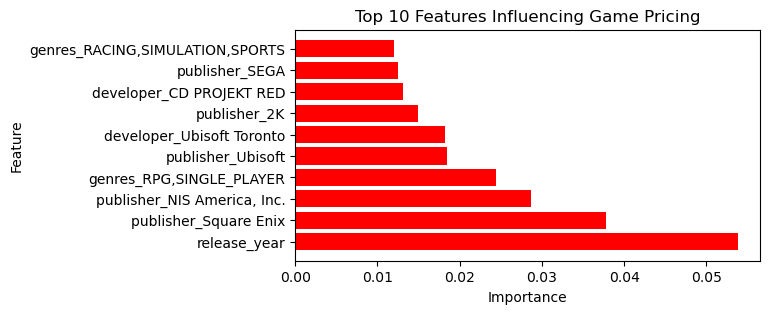

In [37]:
plt.figure(figsize=(6, 3))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Influencing Game Pricing')
plt.show()

Understanding which genres are associated with higher prices, and how this varies by platform or developer, can provide valuable insights into market dynamics, helping to strategically adjust pricing for future game releases.

- Release year significantly influences game pricing—older titles tend to be discounted, while newer releases often retain higher prices.
- Larger publishers (e.g., Square Enix, Ubisoft, SEGA) and renowned developers (e.g., CD PROJEKT RED) typically command higher prices for their games, leveraging brand power and consumer trust.
- Genres such as RPG, SINGLE_PLAYER, RACING, SIMULATION, and SPORTS are strongly correlated with higher game prices due to their popularity and complexity.

This analysis can provide valuable insights into market dynamics across different genres, platforms, and developers, enabling more strategic pricing adjustments for future game releases.

In [43]:
# prepare data
games_genres = games.copy()
# drop nan rows for genres
games_genres = games_genres.dropna(subset=['genres'])
# split genres into multiple rows for each genre
games_genres['genres'] = games_genres['genres'].str.split(',')
games_genres = games_genres.explode('genres')

# drop rows with missing/invalid data for these columns
games_genres = games_genres.dropna(subset=['price', 'developer', 'platform'])
games_genres.head()

,id,name,game_slug,price,release_date,platform,description,developer,publisher,genres,release_year
0,4c81547b81064acfb1902be7b06d6366,Assassin's Creed® I: Director's Cut,assassins-creed-1,19.99,2008-04-09T15:00:00.000Z,Windows,"You are an Assassin, a warrior shrouded in sec...",Ubisoft,Ubisoft,ACTION,2008
0,4c81547b81064acfb1902be7b06d6366,Assassin's Creed® I: Director's Cut,assassins-creed-1,19.99,2008-04-09T15:00:00.000Z,Windows,"You are an Assassin, a warrior shrouded in sec...",Ubisoft,Ubisoft,RPG,2008
1,3fdbd69050ec4091a68481b397f0a5dd,LEGO® Batman™: The Videogame,lego-batman,19.99,2008-09-28T15:00:00.000Z,Windows,When all the villains in Arkham Asylum team up...,Traveller's Tales,Warner Bros.,ACTION,2008
2,5f82cbea3fdd42e2b9b9dfe8439b96b3,World of Goo,world-of-goo,14.99,2008-10-13T15:00:00.000Z,"Windows,Mac",You Can't Stop Progress,2D Boy,2D Boy,INDIE,2008
2,5f82cbea3fdd42e2b9b9dfe8439b96b3,World of Goo,world-of-goo,14.99,2008-10-13T15:00:00.000Z,"Windows,Mac",You Can't Stop Progress,2D Boy,2D Boy,PUZZLE,2008


In [45]:
avg_price_by_genre = games_genres.groupby('genres')['price'].mean().sort_values(ascending=False)
print("Average Price by Genre:")
print(avg_price_by_genre.head(10))

Average Price by Genre:
genres
ROLE_PLAYING     39.990000
4X               38.990000
OPEN_WORLD       33.447708
SPORTS           33.375385
FANTASY          31.353636
TURN_BASED       30.170606
RPG              29.945752
SINGLE_PLAYER    28.095000
CO_OP            28.067949
CITY_BUILDER     27.132857
Name: price, dtype: float64


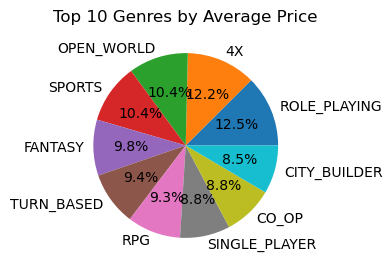

In [53]:
plt.figure(figsize=(6, 3))
avg_price_by_genre.head(10).plot(kind='pie', autopct='%1.1f%%', color='#7fcef3')
plt.title('Top 10 Genres by Average Price')
plt.ylabel('')
plt.show()

In [55]:
distinct_platforms = games['platform'].unique()
print(distinct_platforms)

['Windows' 'Windows,Mac' 'Mac,Windows' nan 'Windows,Mac,Win32'
 'Windows,Win32' 'Windows,Mac OS' 'Windows,MAC' 'Windows, Mac'
 'Windows,Mac - Coming Soon' 'Mac,Windoes' 'windows']


In [57]:
# replace inconsistent platform names with normal names
games_genres['platform'] = games_genres['platform'].replace({
    'Windows,MAC': 'Windows,Mac',
    'Mac,Windoes': 'Mac,Windows',  # Correct the typo
    'Windows, Mac': 'Windows,Mac',
    'windows': 'Windows',
    'Windows,Mac - Coming Soon': 'Windows,Mac'
})

# drop any remaining rows with NaN in the price or platform columns
games_genres = games_genres.dropna(subset=['price', 'platform'])

In [59]:
avg_price_by_genre_platform  = games_genres.groupby(['genres', 'platform'])['price'].mean().unstack()

print("Average Price by Genre and Platform:")
print(avg_price_by_genre_platform[:5])

Average Price by Genre and Platform:
platform       Mac,Windows    Windows  Windows,Mac  Windows,Mac OS  \
genres                                                               
4X                     NaN  36.240000    49.990000             NaN   
ACTION           17.490000  26.841538    20.451538             NaN   
ADVENTURE        16.323333  23.222704    19.714138             NaN   
ARCADE                 NaN  19.920000    14.990000             NaN   
BASE_BUILDING          NaN  24.990000    29.990000             NaN   

platform       Windows,Mac,Win32  Windows,Win32  
genres                                           
4X                           NaN            NaN  
ACTION                       NaN          18.49  
ADVENTURE                    NaN            NaN  
ARCADE                       NaN            NaN  
BASE_BUILDING                NaN            NaN  


In [65]:
import seaborn as sns

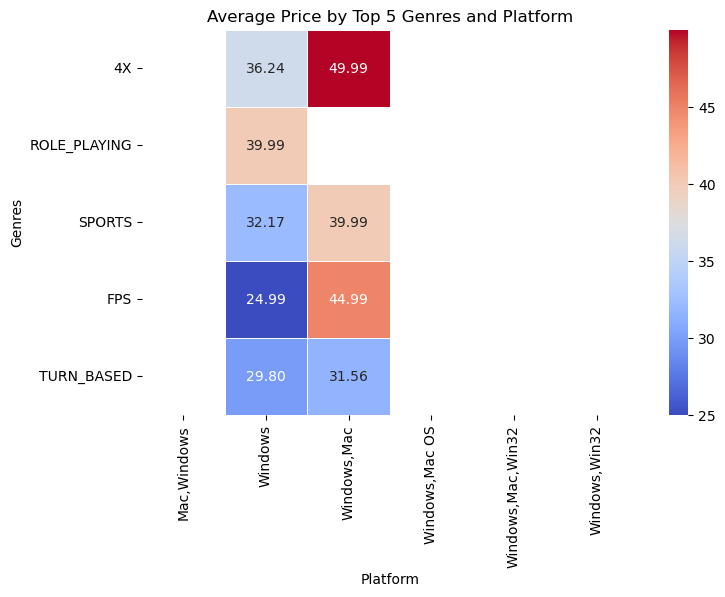

In [67]:
# get the top 5 genres by average price
top_5_genres = avg_price_by_genre_platform.mean(axis=1).nlargest(5).index

# filter the dataset to include only the top 5 genres
top_5_data = avg_price_by_genre_platform.loc[top_5_genres]

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(top_5_data, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Average Price by Top 5 Genres and Platform')
plt.xlabel('Platform')
plt.ylabel('Genres')
plt.show()

The heatmap reveals key insights into the pricing patterns across the top 5 game genres on different platforms. It visually highlights that certain genres, such as RPG and SIMULATION, tend to have higher average prices.

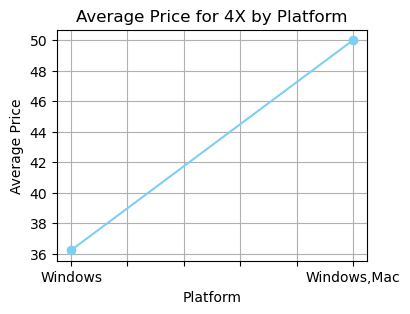

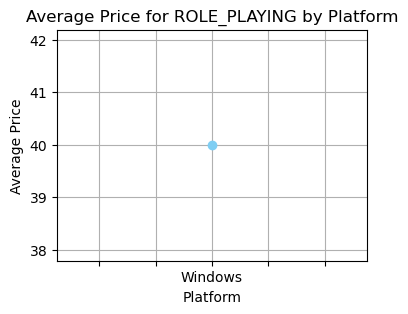

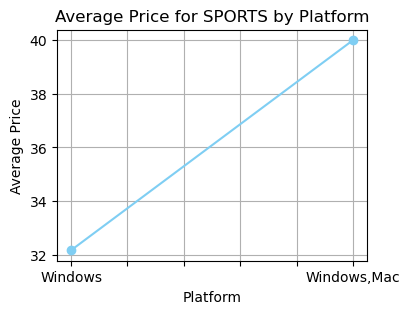

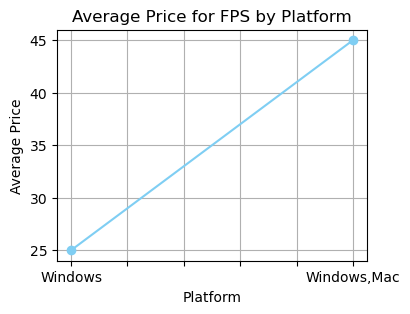

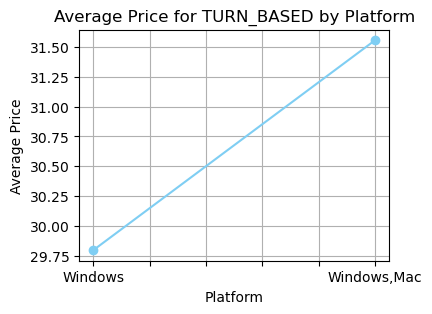

In [70]:
# Create individual line plots for the top 5 genres
for genre in top_5_genres:
    plt.figure(figsize=(4, 3))
    avg_price_by_genre_platform.loc[genre].plot(kind='line', marker='o', linestyle='-', color='#7fcef3')
    plt.title(f'Average Price for {genre} by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.show()

- RPG, 4X, Open World, Sports, and Fantasy genres are linked with the highest game prices, indicating that these genres tend to command a premium in the market.
- Multi-platform games (e.g., Windows, Mac) generally have higher prices, particularly in genres like 4X and FPS, suggesting that the versatility of being available on multiple platforms can drive up the pricing.

Now lets determine if there is any seasonal effect on game pricing, such as higher prices during holiday seasons or specific times of the year.

In [74]:
# extract month
games['release_month'] = pd.to_datetime(games['release_date']).dt.month
games_season = games.copy()
# split the 'genres' column into multiple genres
games_season['genres'] = games_season['genres'].str.split(',')
# so that each genre gets its own row
games_season = games_season.explode('genres')

# group by month and genre; ensure missing values = 0
monthly_releases_by_genre = games_season.groupby(['release_month', 'genres']).size().unstack(fill_value=0)
# group by month and developer
monthly_releases_by_developer = games_season.groupby(['release_month', 'developer']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

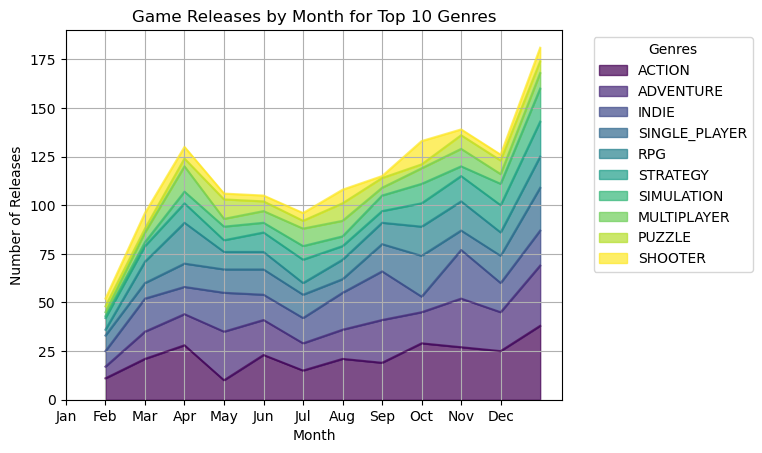

In [78]:
top_10_genres = games_season['genres'].value_counts().nlargest(10).index
filtered_data = monthly_releases_by_genre[top_10_genres]

plt.figure(figsize=(10, 6))
filtered_data.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)
plt.title('Game Releases by Month for Top 10 Genres')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

- October and December see the highest concentration of game releases across all genres, likely due to the holiday season and peak user engagement.
- Action, RPG, Simulation, and Indie genres experience a surge in releases towards the end of the year, particularly in October and December, capitalizing on increased holiday shopping and user activity.
- January shows a noticeable dip in releases, with a steady increase in the number of releases as the year progresses, indicating a trend of fewer game launches in the first quarter of the year.

<Figure size 600x400 with 0 Axes>

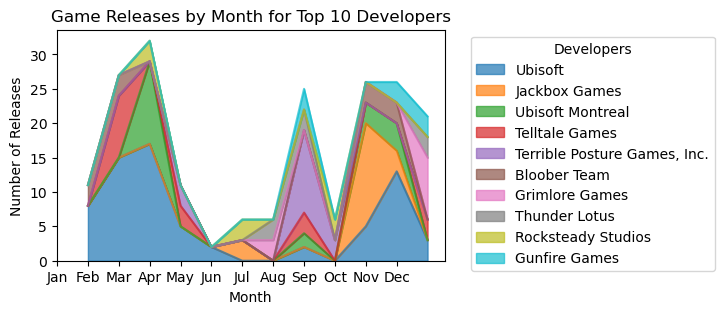

In [80]:
top_10_developers = games_season['developer'].value_counts().nlargest(10).index
filtered_data_developer = monthly_releases_by_developer[top_10_developers]

plt.figure(figsize=(6, 4))
filtered_data_developer.plot(kind='area', stacked=True, figsize=(5, 3), alpha=0.7)
plt.title('Game Releases by Month for Top 10 Developers')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Developers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Ubisoft, Square Enix, and Ubisoft Montreal exhibit a notable concentration of game releases in February and October, correlating with major gaming events and the holiday sales period.
- Other developers (e.g., Telltale Games and Jackbox Games) have more varied release patterns, with peaks in June and August, likely tied to summer promotions.
- April and May also see a moderate number of releases across several developers, suggesting a trend of pre-summer game launches.

In [84]:
# convert the 'release_date' column to datetime; converted to timezone-naive datetime format
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce').dt.tz_localize(None)

def categorize_sale_period(date):
    year = date.year
    if pd.Timestamp(f'{year}-02-01') <= date <= pd.Timestamp(f'{year}-02-15'):
        return 'February Savings'
    elif pd.Timestamp(f'{year}-03-07') <= date <= pd.Timestamp(f'{year}-03-14'):
        return 'End of Winter Sale'
    elif pd.Timestamp(f'{year}-03-14') <= date <= pd.Timestamp(f'{year}-03-28'):
        return 'Spring Sale'
    elif pd.Timestamp(f'{year}-05-16') <= date <= pd.Timestamp(f'{year}-06-13'):
        return 'Mega Sale'
    elif pd.Timestamp(f'{year}-07-18') <= date <= pd.Timestamp(f'{year}-08-01'):
        return 'Summer Sale'
    elif pd.Timestamp(f'{year}-10-16') <= date <= pd.Timestamp(f'{year}-10-30'):
        return 'Halloween Sale'
    elif pd.Timestamp(f'{year}-11-19') <= date <= pd.Timestamp(f'{year}-11-26'):
        return 'Black Friday Sale'
    elif pd.Timestamp(f'{year}-12-05') <= date <= pd.Timestamp(f'{year}-12-07'):
        return 'The Game Awards Sale'
    elif pd.Timestamp(f'{year}-12-11') <= date <= pd.Timestamp(f'{year}-01-02'):
        return 'Holiday Sale'
    else:
        return 'Other'

games['sale_period'] = games['release_date'].apply(categorize_sale_period)

# Check the first few rows with the sale period labels
print(games[['release_date', 'sale_period']].tail())

           release_date       sale_period
910 2022-02-08 16:00:00  February Savings
911 2022-02-10 14:00:00  February Savings
912 2022-02-10 15:45:00  February Savings
913 2022-02-10 16:30:00  February Savings
914 2022-02-10 17:00:00  February Savings


Average game prices by sale period:
sale_period
End of Winter Sale      18.741250
February Savings        20.027143
Spring Sale             21.917805
Summer Sale             22.862308
Mega Sale               26.053968
Halloween Sale          26.373500
The Game Awards Sale    27.990000
Black Friday Sale       30.656667
Name: price, dtype: float64


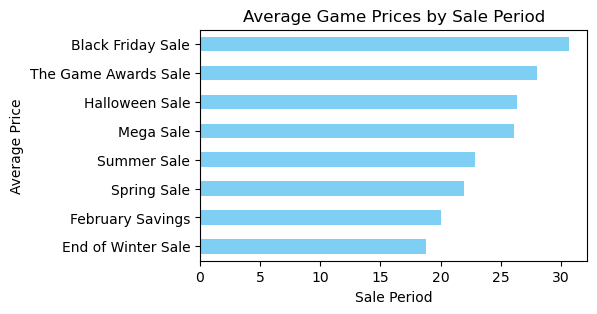

In [88]:
#filter out the 'Other' sale period
avg_price_by_sale_period = games[games['sale_period'] != 'Other'].groupby('sale_period')['price'].mean().sort_values()

print("Average game prices by sale period:")
print(avg_price_by_sale_period)

# visulization
plt.figure(figsize=(5, 3))
avg_price_by_sale_period.plot(kind='barh', color='#7fcef3')
plt.title('Average Game Prices by Sale Period')
plt.xlabel('Sale Period')
plt.ylabel('Average Price')
plt.xticks()
plt.show()

- Games released during Black Friday and The Game Awards sales often have the highest average prices. This trend may be due to premium or highly anticipated titles being launched or heavily promoted during these major holiday sales events.
- The End of Winter Sale has the lowest average prices, followed by the Spring Sale. This suggests that these periods may be aimed at attracting budget-conscious buyers with more affordable